In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [63]:
file_path = r"datasets\trade"
file_spectrum = 30

btc_df = pd.DataFrame(columns=["datetime", "price", "volume"])
eth_df = pd.DataFrame(columns=["datetime", "price", "volume"])
def resample_datasets_to_day(direction='buy'):
    global btc_df, eth_df
    for i in tqdm(range(1, file_spectrum+1)):
        for symbol in ['BTC', 'ETH']:
            path = fr"{file_path}\binance-futures_trades_2023-05-{i:02}_{symbol}USDT.csv\binance-futures_trades_2023-05-{i:02}_{symbol}USDT.csv"
            raw_data = pd.read_csv(path)
            volume = raw_data[raw_data['side']==direction]['amount'].sum()
            price = (raw_data[raw_data['side']==direction]['amount'] * raw_data[raw_data['side']==direction]['price']).sum() / raw_data[raw_data['side']==direction]['amount'].sum()
            new_row = {"datetime": f"2023-05-{i:02}", "price": price, "volume": volume}
            if symbol == "BTC":
                btc_df = btc_df.append(new_row, ignore_index=True)
            else:
                eth_df = eth_df.append(new_row, ignore_index=True)

resample_datasets_to_day()

100%|██████████| 30/30 [02:37<00:00,  5.24s/it]


In [64]:
eth_df

,datetime,price,volume
0,2023-05-01,1837.314457,1830613.967
1,2023-05-02,1848.744807,1566367.567
2,2023-05-03,1873.300668,2084102.485
3,2023-05-04,1891.090881,1307120.209
4,2023-05-05,1938.107254,2645323.217
5,2023-05-06,1924.862331,2335687.430
6,2023-05-07,1906.387584,1581694.343
7,2023-05-08,1851.155214,2425047.343
8,2023-05-09,1844.021094,1254792.082
9,2023-05-10,1846.854841,2438032.265


In [65]:
btc_df

,datetime,price,volume
0,2023-05-01,28344.227180,299961.518
1,2023-05-02,28364.270169,261246.324
2,2023-05-03,28564.013750,342465.316
3,2023-05-04,28971.469791,210626.637
4,2023-05-05,29267.729485,295386.630
5,2023-05-06,29021.320237,230364.311
6,2023-05-07,28852.444605,150881.809
7,2023-05-08,27864.750306,317474.755
8,2023-05-09,27587.219147,184389.401
9,2023-05-10,27694.780430,357773.973


In [66]:
eth_df.to_csv(r"datasets\trade\ETHUSDT_June.csv")
btc_df.to_csv(r"datasets\trade\BTCUSDT_June.csv")

<Axes: >

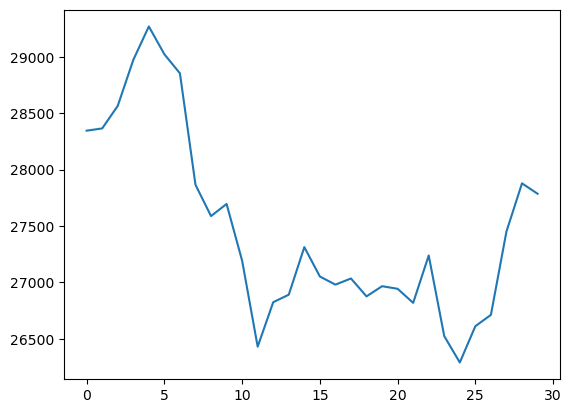

In [68]:
btc_df['price'].plot()

<Axes: >

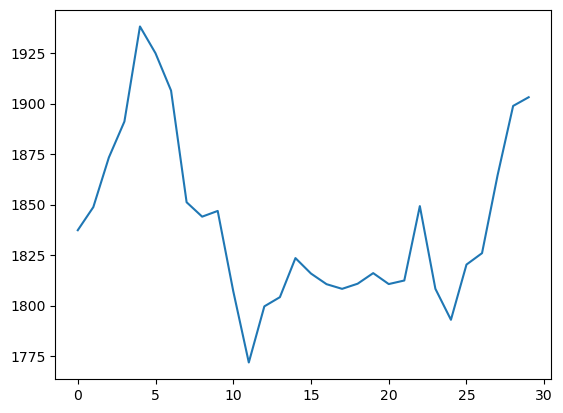

In [71]:
eth_df['price'].plot()

<Axes: >

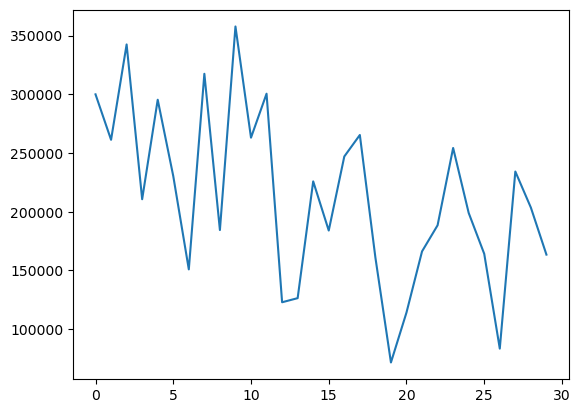

In [69]:
btc_df['volume'].plot()

<Axes: >

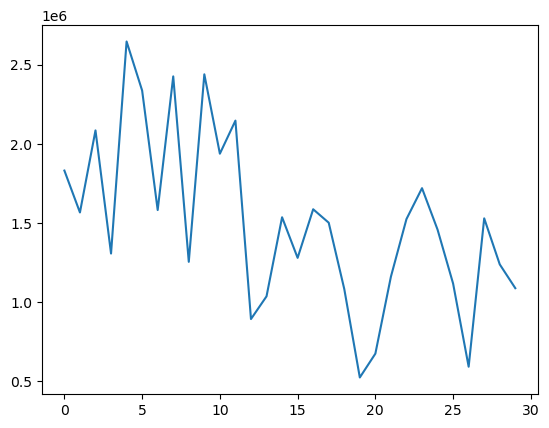

In [70]:
eth_df['volume'].plot()

In [75]:
btc_df['price'].loc[0,]

28344.22717995714

In [90]:
path = fr"C:\Users\dell\data\trade\binance-futures_trades_2023-05-01_BTCUSDT.csv\binance-futures_trades_2023-05-01_BTCUSDT.csv"
raw_data = pd.read_csv(path)
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'], unit='us')
raw_data

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount
0,binance-futures,BTCUSDT,2023-04-30 23:59:59.995,1682899200004280,3643221415,buy,29223.0,0.001
1,binance-futures,BTCUSDT,2023-05-01 00:00:00.034,1682899200042780,3643221416,buy,29223.0,0.001
2,binance-futures,BTCUSDT,2023-05-01 00:00:00.034,1682899200042807,3643221417,buy,29223.0,0.001
3,binance-futures,BTCUSDT,2023-05-01 00:00:00.035,1682899200042808,3643221418,buy,29223.0,0.001
4,binance-futures,BTCUSDT,2023-05-01 00:00:00.038,1682899200045700,3643221419,buy,29223.0,0.039
...,...,...,...,...,...,...,...,...
5751295,binance-futures,BTCUSDT,2023-05-01 23:59:59.715,1682985599721168,3648973178,buy,28054.5,0.025
5751296,binance-futures,BTCUSDT,2023-05-01 23:59:59.793,1682985599799177,3648973179,sell,28054.4,0.159
5751297,binance-futures,BTCUSDT,2023-05-01 23:59:59.793,1682985599799352,3648973180,sell,28054.4,0.072
5751298,binance-futures,BTCUSDT,2023-05-01 23:59:59.941,1682985599947763,3648973181,sell,28054.4,0.128


624974.4890000005

260.40603708333356

In [109]:
100 / 24

4.166666666666667

<Axes: xlabel='timestamp'>

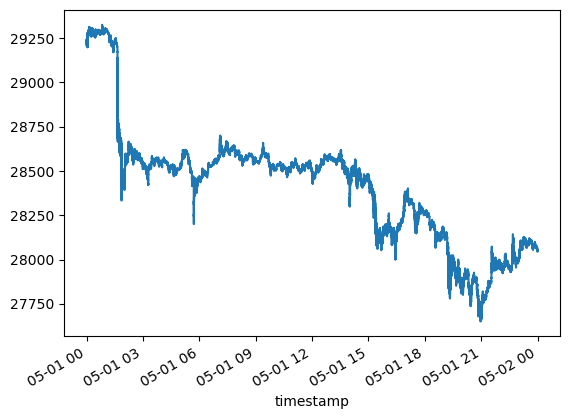

In [116]:
df['price'].plot()